<a href="https://colab.research.google.com/github/omerfaruk8/Karar-agaclari/blob/main/proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yeni proje.xlsx to yeni proje.xlsx


In [ ]:
import pandas as pd
import io

# Yüklenen dosyayı oku
data = pd.read_excel(io.BytesIO(uploaded['yeni proje.xlsx']))

# Veriyi kontrol etmek için ilk birkaç satırı yazdırabilirsiniz
print(data.head())

satir_sayisi, sutun_sayisi = data.shape
print(f"Satır Sayısı: {satir_sayisi}, Sütun Sayısı: {sutun_sayisi}")

df = pd.DataFrame(data)

   SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt   Price
0        2126         4          1             1       1969  215355
1        2459         3          2             1       1980  195014
2        1860         2          1             2       1970  306891
3        2294         2          1             3       1996  206786
4        2130         5          2             2       2001  272436
Satır Sayısı: 50000, Sütun Sayısı: 6


In [ ]:
# Hedef değişken ve bağımsız değişkenleri belirleme
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']]
y = df['Price']

# Veriyi eğitim ve test setlerine bölelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Karar ağacı modelini oluşturun
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hata (MSE): {mse}")

0.9987281988642738
0.09512719430093086
R^2 Score: 0.09512719430093086
Ortalama Kare Hata (MSE): 5305645423.7425


In [ ]:
# Yeni bir ev için fiyat tahmini yapın
predicted_price = model.predict(new_df)
print(f"Yeni ev için tahmini fiyat: {predicted_price[0]}")

new_data = {
    'SquareFeet': [1132], # 1000-2999
    'Bedrooms': [4], # 2-5
    'Bathrooms': [3], # 1-3
    'Neighborhood': [3],
    'YearBuilt': [2016],
}

new_df = pd.DataFrame(new_data)

# Tahmin yapın
predicted_price = model.predict(new_df)
print(f"Yeni ev için tahmini fiyat: {predicted_price[0]}")

Yeni ev için tahmini fiyat: 186418.0
Yeni ev için tahmini fiyat: 126927.0
Yeni ev için tahmini fiyat: 199212.0
Yeni ev için tahmini fiyat: 224883.0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


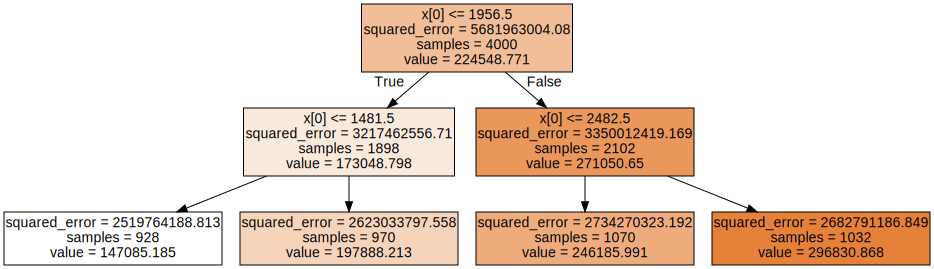

In [ ]:
# karar ağacı görselleştirme
!pip install pydot
!apt-get install graphviz

# aşağıdaki kodu kullanarak karar ağacını görselleştirdik
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

#Regresyon İçin Karar Ağaçları

from sklearn.tree import  DecisionTreeRegressor
model_reg =  DecisionTreeRegressor(max_depth=2)
model_reg.fit(X_train,y_train)

export_graphviz(model_reg, out_file="mytree1.dot",filled=True)
with open("mytree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)